# Assignment4

## imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


## rotating

<function matplotlib.pyplot.show(close=None, block=None)>

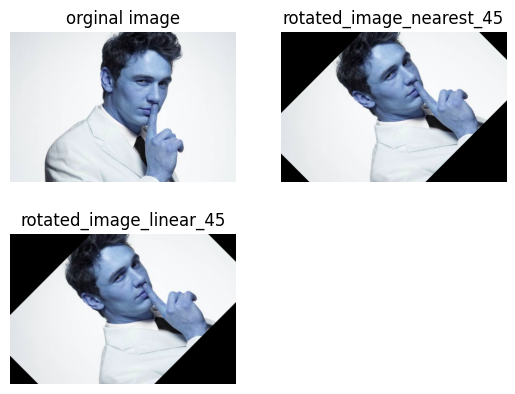

In [2]:
# Load the input image
image1 = cv2.imread('imgfa_ir__5faaa131da1d3_1.jpg')
def rotate_image(image , angel, interpolation=cv2.INTER_NEAREST):
    #getting image's height and weight
    height , width = image.shape[:2]
    #calculate the center of rotating
    center=(width/2,height/2)
    #مقیاس تصویر
    scale=1.0
    #rotating matrix
    rotation_matrix=cv2.getRotationMatrix2D(center,angel,scale)
    rotated_image=cv2.warpAffine(image,rotation_matrix,(width,height),flags=interpolation)
    return rotated_image

rotated_image_nearest_45=rotate_image(image1 , 45 , interpolation=cv2.INTER_NEAREST)
rotated_image_linear_45=rotate_image(image1 , 45 , interpolation=cv2.INTER_LINEAR)
plt.subplot(2,2,1)
plt.imshow(image1)
plt.axis('off')
plt.title('orginal image')
plt.subplot(2,2,2)
plt.imshow(rotated_image_nearest_45)
plt.axis('off')
plt.title('rotated_image_nearest_45')
plt.subplot(2,2,3)
plt.imshow(rotated_image_linear_45)
plt.axis('off')
plt.title('rotated_image_linear_45')
plt.show





<function matplotlib.pyplot.show(close=None, block=None)>

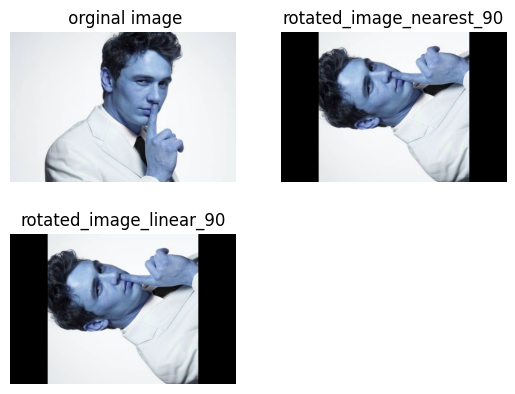

In [3]:
rotated_image_nearest_90=rotate_image(image1 , 90, interpolation=cv2.INTER_NEAREST)
rotated_image_linear_90=rotate_image(image1 , 90, interpolation=cv2.INTER_LINEAR)
plt.subplot(2,2,1)
plt.imshow(image1)
plt.axis('off')
plt.title(' orginal image')
plt.subplot(2,2,2)
plt.imshow(rotated_image_nearest_90)
plt.axis('off')
plt.title('rotated_image_nearest_90')
plt.subplot(2,2,3)
plt.imshow(rotated_image_linear_90)
plt.axis('off')
plt.title('rotated_image_linear_90')
plt.show

## cropping

<function matplotlib.pyplot.show(close=None, block=None)>

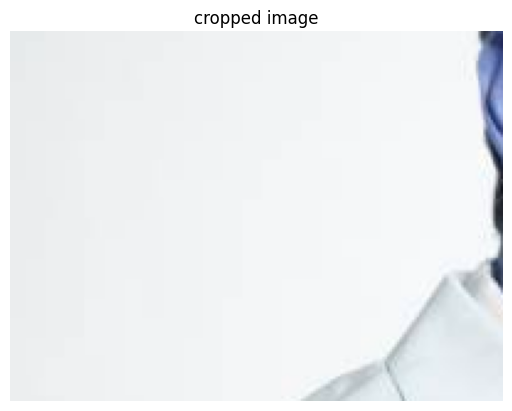

In [4]:
def crop_image(image,y,x,w,h):
    cropped_image=image[y:y+h,x:x+w]
    return cropped_image
cropped_image = crop_image(image1,100,50,200,150)
plt.imshow(cropped_image)
plt.axis('off')
plt.title('cropped image')
plt.show

## affin transformation

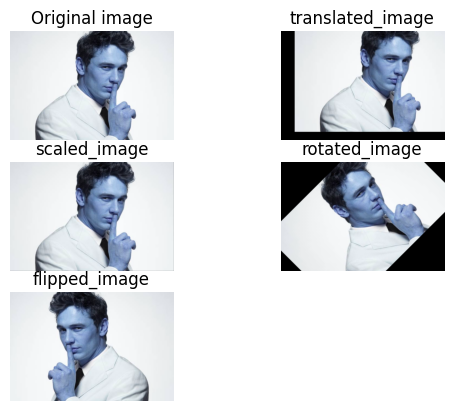

In [5]:


def translate(image, tx, ty):
    # Define the translation matrix
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    
    # Apply the translation
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    
    return translated_image

def scale(image, scale_factor):
    # Define the scaling matrix
    M = np.float32([[scale_factor, 0, 0], [0, scale_factor, 0]])
    
    # Apply the scaling
    scaled_image = cv2.warpAffine(image, M, (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)))
    
    return scaled_image

def rotate(image, angle):
    # Find the center of the image
    center = (image.shape[1] // 2, image.shape[0] // 2)
    
    # Define the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Apply the rotation
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    
    return rotated_image

def flip(image, direction):
    # Direction: 1 for horizontal flip, 0 for vertical flip, -1 for both
    flipped_image = cv2.flip(image, direction)
    
    return flipped_image

# Translate the image by x and y pixels
translated_image = translate(image1, 50, -30)

# Scale the image by a factor of 1.5
scaled_image = scale(image1, 1.5)

# Rotate the image by 45 degrees
rotated_image = rotate(image1, 45)

# Flip the image horizontally
flipped_image = flip(image1, 1)

# Display the original and transformed images
plt.subplot(3, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(3, 2, 2)
plt.imshow(translated_image)
plt.axis('off')
plt.title('translated_image')
plt.subplot(3, 2, 3)
plt.imshow(scaled_image)
plt.axis('off')
plt.title('scaled_image')
plt.subplot(3, 2, 4)
plt.imshow(rotated_image)
plt.axis('off')
plt.title('rotated_image')
plt.subplot(3, 2, 5)
plt.imshow(flipped_image)
plt.axis('off')
plt.title('flipped_image')

plt.show()


## correct perspective

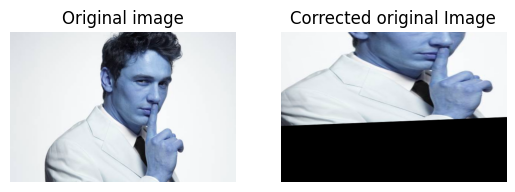

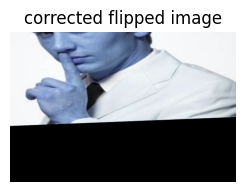

In [6]:


def correct_perspective(image, src_points, dst_points):
    # Calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    
    # Apply the perspective transform
    corrected_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))
    
    return corrected_image
# Define the source and destination points for perspective correction
# The source points are the coordinates of the corners of the distorted object
src_points = np.float32([[141, 131], [480, 159], [493, 630], [64, 601]])
# The destination points are the coordinates of the corners of the corrected object
dst_points = np.float32([[0, 0], [image1.shape[1], 0], [image1.shape[1], image1.shape[0]], [0, image1.shape[0]]])

# Correct the perspective
corrected_image = correct_perspective(image1, src_points, dst_points)

corrected_flipped_image = correct_perspective(flipped_image, src_points, dst_points)
# Display the original and corrected images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(corrected_image)
plt.axis('off')
plt.title('Corrected original Image')
plt.show()
plt.subplot(2, 2, 3)
plt.imshow(corrected_flipped_image)
plt.axis('off')
plt.title('corrected flipped image')
plt.show()



## color quantization

In [38]:


# تصویر را به آرایه NumPy تبدیل کنید
image_array = np.array(image1)

# reshape the image into a 2D array of pixels and convert
# the RGB values to floats
image_data = image_array.reshape((image_array.shape[0] * image_array.shape[1], 3))
image_data = image_data.astype(np.float32)

# تعداد خوشه ها را تعیین کنید
num_clusters = 5
image_hsv=cv2.cvtColor(image1,cv2.COLOR_BGR2HSV)
image_data=image_hsv[:,:,2]

# الگوریتم k-means را اجرا کنید
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(image_data.reshape(-1,1))

# برچسب خوشه را برای هر پیکسل اختصاص دهید
cluster_labels = kmeans.labels_

# تصویر را با رنگ های خوشه ها رنگ آمیزی کنید
segmented_image = np.zeros(image_array.shape)
for i, cluster_label in enumerate(cluster_labels):
    if i < len(kmeans.cluster_centers_):
    segmented_image[i]=kmeans.cluster_centers_[cluster_label]
else:
    print("warning",i)
segmented_image=cv2.cvtColor(segmented_image,cv2.COLOR_HSV2BGR)    
# تصویر تفکیک شده را نمایش دهید
cv2.imshow('Segmented Image', segmented_image.astype(np.uint8))
cv2.waitKey(0)

IndentationError: expected an indented block after 'if' statement on line 24 (2847915599.py, line 25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


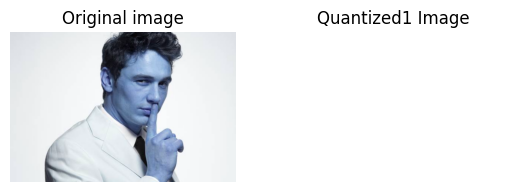

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


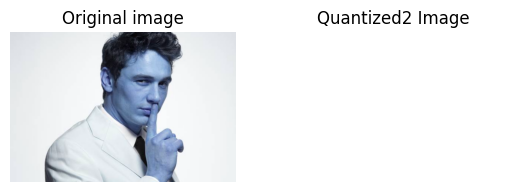

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


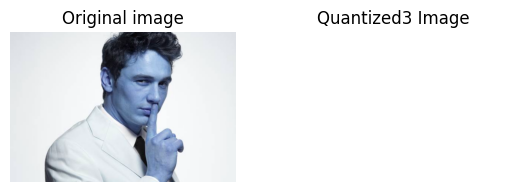

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


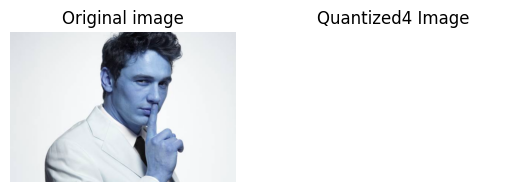

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


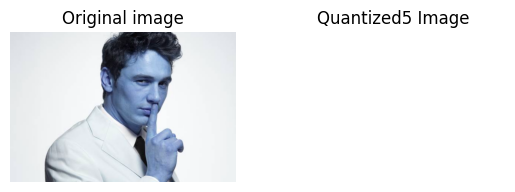

In [29]:



def color_quantization(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))
    
    # Apply K-Means clustering to find k dominant colors
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Replace each pixel with the nearest centroid
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reshape the quantized pixels back to the original image shape
    quantized_image = quantized_pixels.reshape(image.shape)
    
    return quantized_image


# Number of dominant colors to find
k1 = 5
k2 = 6
k3 = 7
k4 = 8
k5 = 9

# Perform color quantization
quantized1_image = color_quantization(image1, k1)

# Display the original and quantized images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(quantized1_image)
plt.axis('off')
plt.title('Quantized1 Image')
plt.show()


# Perform color quantization
quantized2_image = color_quantization(image1, k2)

# Display the original and quantized images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(quantized2_image)
plt.axis('off')
plt.title('Quantized2 Image')
plt.show()

# Perform color quantization
quantized3_image = color_quantization(image1, k3)

# Display the original and quantized images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(quantized3_image)
plt.axis('off')
plt.title('Quantized3 Image')
plt.show()

# Perform color quantization
quantized4_image = color_quantization(image1, k4)

# Display the original and quantized images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(quantized4_image)
plt.axis('off')
plt.title('Quantized4 Image')
plt.show()

# Perform color quantization
quantized5_image = color_quantization(image1, k5)
# Display the original and quantized images
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(quantized5_image)
plt.axis('off')
plt.title('Quantized5 Image')
plt.show()


## color space conversion

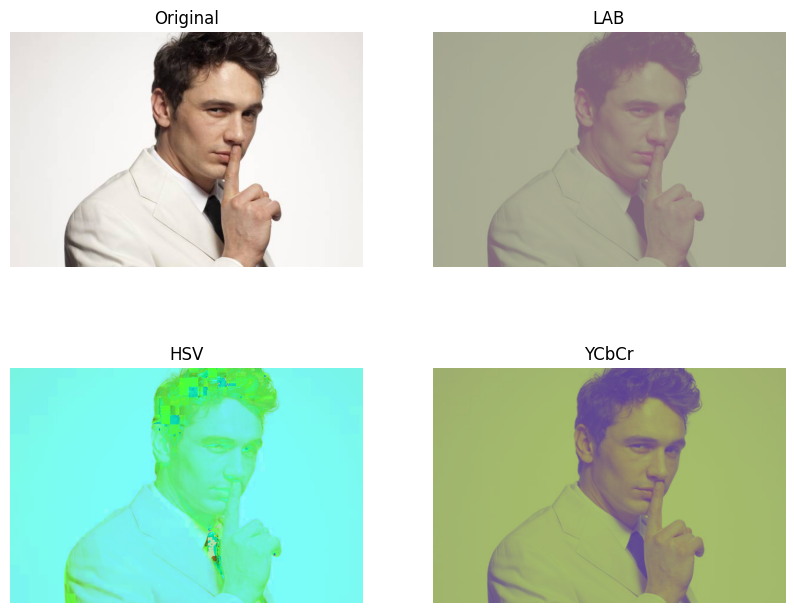

In [17]:




# Convert the image to LAB color space
lab_image = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

# Convert the image to YCbCr color space
ycbcr_image = cv2.cvtColor(image1, cv2.COLOR_BGR2YCrCb)

# Plot the images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('LAB')
plt.imshow(cv2.cvtColor(lab_image, cv2.COLOR_RGB2LAB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('HSV')
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_RGB2HSV))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('YCbCr')
plt.imshow(cv2.cvtColor(ycbcr_image, cv2.COLOR_RGB2YCrCb))
plt.axis('off')

plt.show()
